# Naval Carrier Injuries: Data Exploration
## Importing Data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
NONAVIATION_PATH = "nonaviation_injuries.csv"
AVIATION_PATH = "aviation_injuries.csv"

nadf = pd.read_csv(NONAVIATION_PATH)
adf = pd.read_csv(AVIATION_PATH)

### Data Cleaning

In [42]:
nadf = nadf.assign(PAYGRADE_GROUPED=lambda df : df['PAYGRADE'].map(lambda pg: str(pg) if str(pg)[0] == "E" 
                                                                    else str(pg) if str(pg)[0] == "O"
                                                                    else "Other"))
nadf['PAYGRADE_GROUPED'].value_counts()

nadf_enc = nadf.copy()
# nadf_enc = nadf.dropna(axis='index', subset=feature_cols).copy()

cleanup_nums = {"PAYGRADE_GROUPED": {
                                     "E01": 1, 
                                     "E02": 2,
                                     "E03": 3,
                                     "E04": 4,
                                     "E05": 5,
                                     "E06": 6,
                                     "E07": 7,
                                     "E08": 8,
                                     "E09": 9,
                                     "Other": 10,
                                     "O01": 11,
                                     "O02": 12,
                                     "O03": 13,
                                     "O04": 14,
                                     "O05": 15,
                                     "O06": 16},
                "INJ_CLASSN_C": {"A": 8, "B": 7, "C": 6, "D": 5,
                                  "E": 4, "F": 3, "G":2 , "H": 1},
                "EVENT_SEVTY_C": {"A": 8, "B": 7, "C": 6, "D": 5,
                                  "E": 4, "F": 3, "G":2 , "H": 1},
#                 "SEX_C": {"M": 0, "F": 1}
               }

nadf_enc.replace(cleanup_nums, inplace=True)
np.savetxt(r'PCN_NAMES.txt', nadf_enc.PCN_NAME, fmt='%s')
nadf_enc.head()

,INVLVD_PER_SERL,PAYGRADE,RANK_RATE,RATEG,DESG_C,NEC_C,PCN_C,AREA_C,INJ_CLASSN_C,AGE,...,RPRTBL_EVENT_SERL,EVENT_DATE_TIME,FY,BRIEF_NARR,RPRTG_UNIT_CODE,EVENT_SEVTY_C,INVLVD_UNIT_CODE,ACTY_NAME_LONG,VESL_TYPE,PAYGRADE_GROUPED
0,28292.0,E03,AN,AMAN,NaN,NaN,MS-05-00,1G05027,4.0,21.0,...,26968,4/12/2006 2:30:00 AM,2006,MV TRIPPED ON THE LAST STEP OF LADDERWELL AND ...,N21412,D,N21412,GEORGE WASHINGTON,CVN,3
1,28293.0,E04,PO3,BM3,NaN,NaN,MS-05-00,1G08004,4.0,26.0,...,26971,4/27/2006 10:00:00 PM,2006,MV WAS HIT IN THE HAND BY A DOOR HANDLE LEADIN...,N21412,D,N21412,GEORGE WASHINGTON,CVN,4
2,45859.0,E05,PO2,ABF2,NaN,NaN,ID-23-00,1G03048,4.0,42.0,...,42793,9/27/2006 10:20:00 AM,2006,MV cut hand with hatch. ...,N03369,D,N03369,USS DWIGHT D EISENHOWER (CVN-69),CVN,5
3,24336.0,E04,PO3,MM3,NaN,NaN,MS-05-00,1G04010,5.0,24.0,...,23402,12/16/2005 12:30:00 PM,2006,Member slipped and fell down ladder well break...,N22178,C,N22178,RONALD REAGAN,CVN,4
4,22655.0,E03,AN,AZAN,NaN,NaN,MS-05-00,4G09999,2.0,25.0,...,21869,12/23/2005 7:30:00 PM,2006,SMN spraned right ankle ...,N21247,D,N21247,USS THEODORE ROOSEVELT,CVN,3


In [99]:
nadf_enc = nadf_enc[(nadf["AGE"] > 0) & (nadf_enc["AGE"] < 55)]
nadf_enc = nadf_enc[nadf["FY"] > 2000]

C:\Users\Edward\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Edward\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


21.0    1022
22.0     956
20.0     854
23.0     699
19.0     548
24.0     518
25.0     361
26.0     295
27.0     253
28.0     215
29.0     184
30.0     126
32.0     120
31.0     111
18.0      88
33.0      74
34.0      68
35.0      67
37.0      58
36.0      42
39.0      39
40.0      38
38.0      29
41.0      20
42.0      16
43.0      13
44.0      12
46.0      11
47.0      10
45.0       9
49.0       6
52.0       5
50.0       3
48.0       3
15.0       2
53.0       2
51.0       1
16.0       1
54.0       1
Name: AGE, dtype: int64

## Exploratory Data Analysis
### Univariate Analysis

In [202]:
adf_enc = adf.copy()
# nadf_enc = nadf.dropna(axis='index', subset=feature_cols).copy()

cleanup_nums = {"PAYGRADE_GROUPED": {
                                     "E01": 1, 
                                     "E02": 2,
                                     "E03": 3,
                                     "E04": 4,
                                     "E05": 5,
                                     "E06": 6,
                                     "E07": 7,
                                     "E08": 8,
                                     "E09": 9,
                                     "Other": 10,
                                     "O01": 11,
                                     "O02": 12,
                                     "O03": 13,
                                     "O04": 14,
                                     "O05": 15,
                                     "O06": 16},
                "INJ_CLASSN_C": {"A": 8, "B": 7, "C": 6, "D": 5,
                                  "E": 4, "F": 3, "G":2 , "H": 1},
                "EVENT_SEVTY_C": {"A": 8, "B": 7, "C": 6, "D": 5,
                                  "E": 4, "F": 3, "G":2 , "H": 1},
#                 "SEX_C": {"M": 0, "F": 1}
               }

adf_enc.replace(cleanup_nums, inplace=True)
# np.savetxt(r'PCN_NAMES.txt', adf_enc.PCN_NAME, fmt='%s')
adf_enc.head()

,RPRTBL_EVENT_SERL,EVENT_DATE,EVENT_SEVTY_C,FY,EVENT_CLASSN_C,SHIP_PER_INJ_I,INVLVD_SHIP_UIC,VESL_NAME_A,VESL_TYPE_A,INVLVD_ACFT_SERL,...,RATEG,RPRTG_UIC,EVENT_SHORT_NARR,INCDT_OCCURN_SERL,INCDT_PHASE_OPS_C,INCDT_TYPE_C,INCDT_PHASE_OPS,INCDT_TYPE,SEX,INJ_CLASSN
0,80604,4/1/1997 12:00:00 AM,6,1997,1C,N,N03362,INDEPENDENCE,CV,85709,...,NaN,N09209,ACFT STRUCK AND DAMAGED 3 PARKED ACFT ON NIGHT...,151487,52Z,A3,NO FURTHER BREAKDOWN,COLLISION BETWEEN AN AIRBORNE AIRCRAFT AND ONE...,NaN,NO INJURY OR ILLNESS
1,80604,4/1/1997 12:00:00 AM,6,1997,1C,N,N03362,INDEPENDENCE,CV,85709,...,NaN,N09209,ACFT STRUCK AND DAMAGED 3 PARKED ACFT ON NIGHT...,151488,52Z,PD,NO FURTHER BREAKDOWN,AIRFRAME,NaN,NO INJURY OR ILLNESS
2,s,4/1/1997 12:00:00 AM,6,1997,1C,N,N03362,INDEPENDENCE,CV,85709,...,NaN,N09209,ACFT STRUCK AND DAMAGED 3 PARKED ACFT ON NIGHT...,151487,52Z,A3,NO FURTHER BREAKDOWN,COLLISION BETWEEN AN AIRBORNE AIRCRAFT AND ONE...,NaN,NO INJURY OR ILLNESS
3,80604,4/1/1997 12:00:00 AM,6,1997,1C,N,N03362,INDEPENDENCE,CV,85709,...,NaN,N09209,ACFT STRUCK AND DAMAGED 3 PARKED ACFT ON NIGHT...,151488,52Z,PD,NO FURTHER BREAKDOWN,AIRFRAME,NaN,NO INJURY OR ILLNESS
4,80604,4/1/1997 12:00:00 AM,6,1997,1C,N,N03362,INDEPENDENCE,CV,85709,...,NaN,N09209,ACFT STRUCK AND DAMAGED 3 PARKED ACFT ON NIGHT...,151487,52Z,A3,NO FURTHER BREAKDOWN,COLLISION BETWEEN AN AIRBORNE AIRCRAFT AND ONE...,NaN,NO INJURY OR ILLNESS


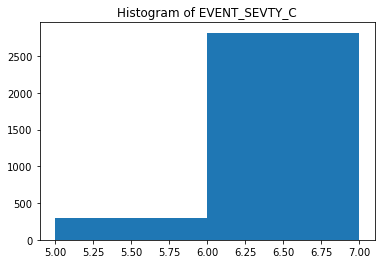

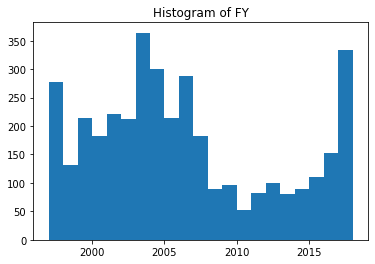

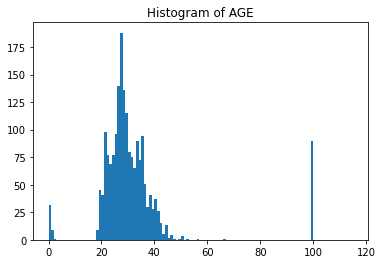

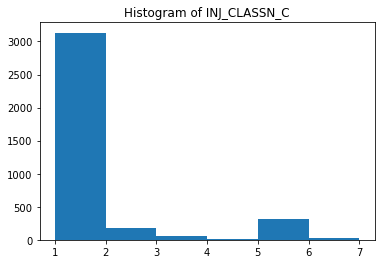

In [206]:
# df = adf_enc

df.describe()
target = 'INJ_CLASSN_C'

numeric_features = df.select_dtypes(include=[np.number]).copy()
# numeric_features.drop(['INVLVD_PER_SERL', 'RPRTBL_EVENT_SERL'], axis=1, inplace=True)

for feature in numeric_features.columns:
    plt.title("Histogram of {}".format(feature))
    expl = numeric_features[feature]
    plt.hist(expl,
             bins=np.arange(np.floor(np.min(expl)), np.ceil(np.max(expl)), 1))
    plt.show()

In [208]:
adf["INJ_CLASSN_C"].value_counts()

H    3132
D     320
G     179
A     116
F      51
C      24
E      18
B       8
Name: INJ_CLASSN_C, dtype: int64

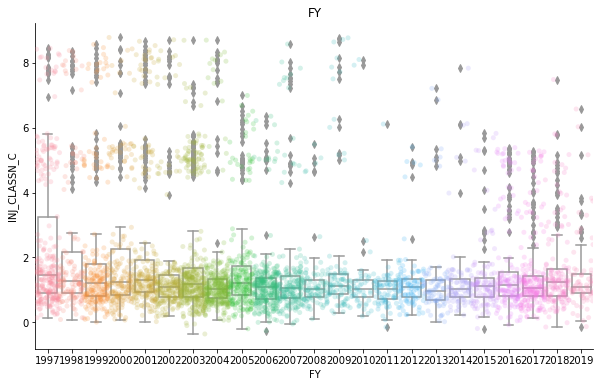

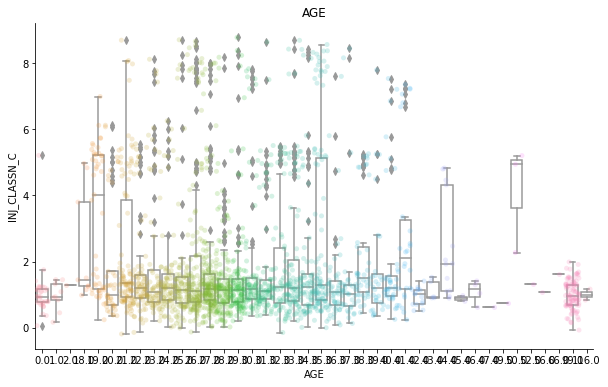

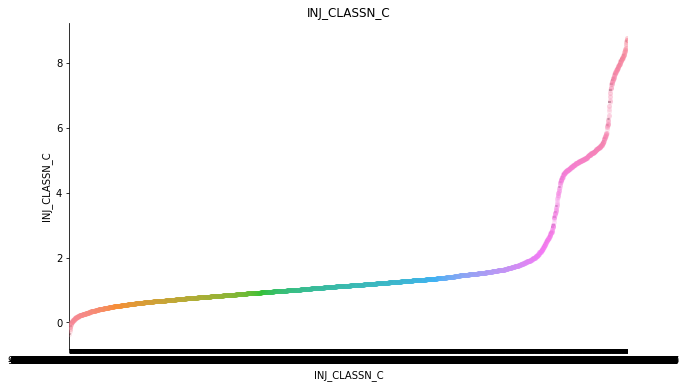

In [209]:
import seaborn as sns

data_jitter=df.copy()
# data_jitter['FY'] = np.random.normal(0, 0.4, len(data_jitter['FY']))+data_jitter['FY']
# data_jitter['PAYGRADE_GROUPED'] = np.random.normal(0, 0.4, len(data_jitter['PAYGRADE_GROUPED']))+data_jitter['PAYGRADE_GROUPED']
data_jitter[target] = np.random.normal(0, 0.4, len(data_jitter[target]))+data_jitter[target]

for feature in numeric_features.columns[1:]:
    x_var = feature
    y_var = target
    
    plt.figure(figsize=(10,6))
    sns.stripplot(x_var, y_var, data=data_jitter, alpha=0.21, jitter=.5)
    sns.boxplot(x_var, y_var, data=data_jitter, color="white")
    sns.despine()
    plt.ylabel(y_var)
    plt.xlabel(x_var)
    plt.title(feature)
    plt.show()

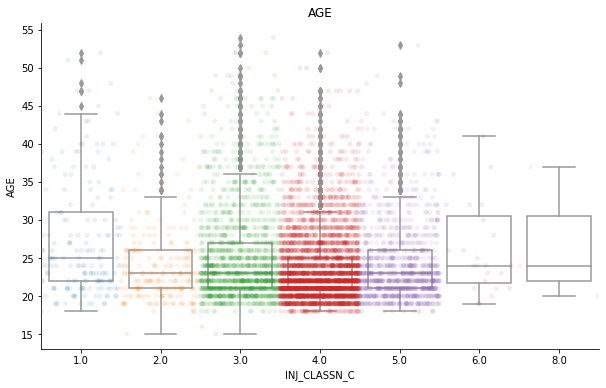

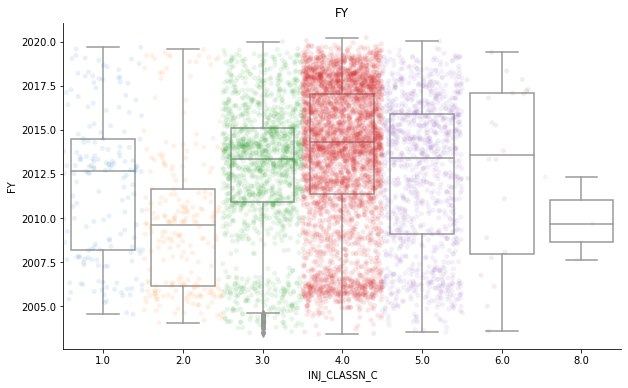

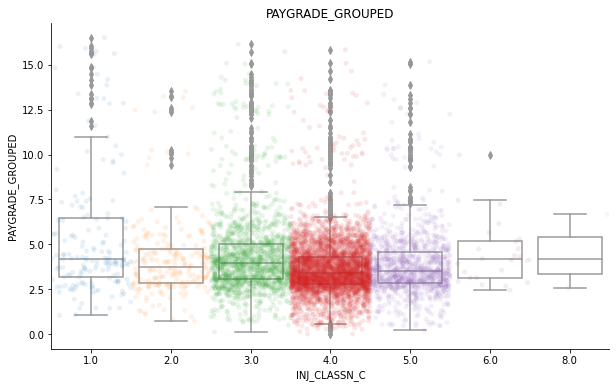

In [170]:
data_jitter=df.copy()
data_jitter['FY'] = np.random.normal(0, 0.4, len(data_jitter['FY']))+data_jitter['FY']
data_jitter['PAYGRADE_GROUPED'] = np.random.normal(0, 0.4, len(data_jitter['PAYGRADE_GROUPED']))+data_jitter['PAYGRADE_GROUPED']


for feature in numeric_features.columns[1:]:
    x_var = target
    y_var = feature
    
    plt.figure(figsize=(10,6))
    sns.stripplot(x_var, y_var, data=data_jitter, alpha=0.1, jitter=.5)
    sns.boxplot(x_var, y_var, data=data_jitter, color="white")
    sns.despine()
    plt.ylabel(y_var)
    plt.xlabel(x_var)
    plt.title(feature)
    plt.show()

In [194]:
categorical_features = ['PCN_NAME', 'AREA', 'EVOL', 'EVENT_SEVTY_C', 'ACTY_NAME_LONG']

v = df[categorical_features].copy()
df_filtered = df[v.replace(v.stack().value_counts()).gt(10).all(1)]


for feature in categorical_features:
#     plt.title("Bar plot of {}".format(feature))
    print(df_filtered[feature].value_counts())
    print("\n\n")
#     plt.hist(expl,
#              bins=np.arange(np.floor(np.min(expl)), np.ceil(np.max(expl)), 1))
#     plt.show()

Walking/Stepping/Marching                                 359
Other                                                     252
Ascending/Descending stairs/steps                         172
Aviation-related Activities                                90
Maintenance                                                62
Handling                                                   51
Multiple Operations                                        47
Aviation-related (work spaces, supply, etc.)               36
Preventive (PMS)                                           34
Handling Supplies                                          32
Corrective                                                 24
Basketball                                                 23
Servicing                                                  17
Sleeping                                                   16
Aircraft Maintenance, Handling, Moving, etc. Aboard CV     13
GSE Maintenance/Servicing                                  12
Weight L

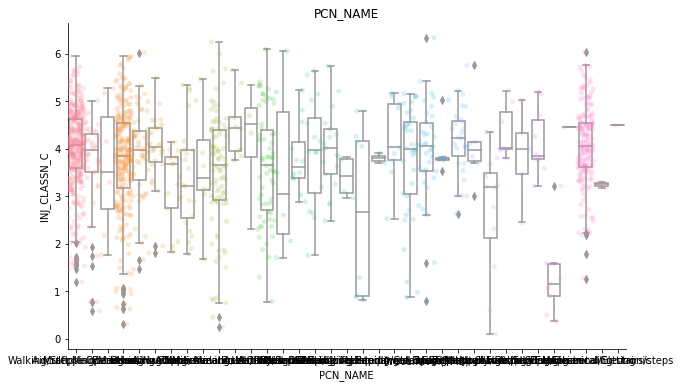

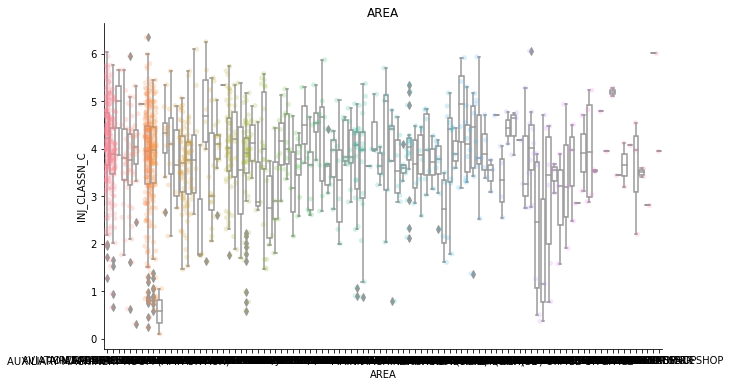

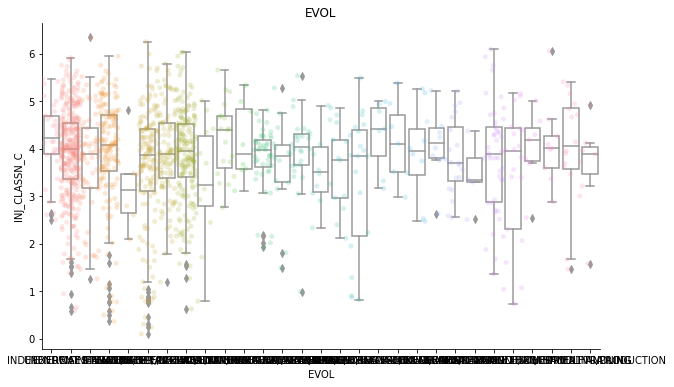

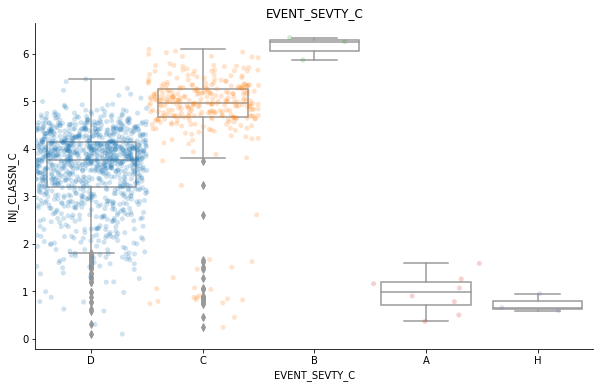

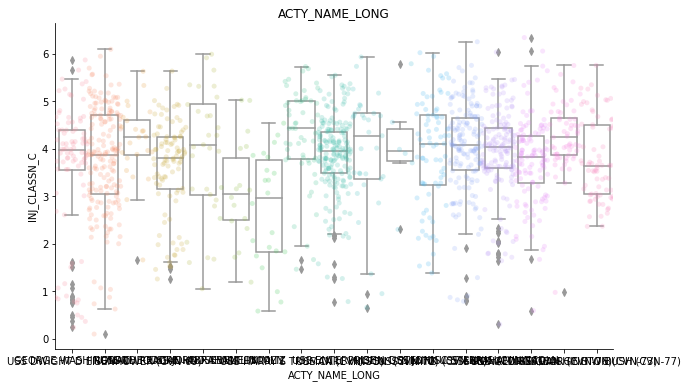

In [196]:
data_jitter=df_filtered.copy()
# data_jitter['FY'] = np.random.normal(0, 0.4, len(data_jitter['FY']))+data_jitter['FY']
# data_jitter['PAYGRADE_GROUPED'] = np.random.normal(0, 0.4, len(data_jitter['PAYGRADE_GROUPED']))+data_jitter['PAYGRADE_GROUPED']
data_jitter[target] = np.random.normal(0, 0.4, len(data_jitter[target]))+data_jitter[target]

for feature in categorical_features:
    x_var = feature
    y_var = target
    
    plt.figure(figsize=(10,6))
    sns.stripplot(x_var, y_var, data=data_jitter, alpha=0.21, jitter=.5)
    sns.boxplot(x_var, y_var, data=data_jitter, color="white")
    sns.despine()
    plt.ylabel(y_var)
    plt.xlabel(x_var)
    plt.title(feature)
    plt.show()


In [201]:
# enc = preprocessing.OrdinalEncoder()
# enc.fit(nadf_enc['SEX_C'].values.reshape((-1, 1)))

# nadf_enc['SEX_C'] = enc.transform(nadf_enc['SEX_C'].values.reshape((-1, 1))).reshape((-1,))

# nadf_enc[feature_cols]


In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

#split dataset in features and target variable
feature_cols = ['PAYGRADE_GROUPED', 
                'AGE', 
                'SEX_C', 
#                 'AREA', 
#                 'PCN_NAME', 
#                 'EVOL', 
                'FY']

# other ones: ['EVENT_SEVTY_C', 'ACTY_NAME_LONG', 'VESL_TYPE']



ValueError: Input contains NaN

## Make Decision Tree Classifier

ValueError: Input contains NaN

In [82]:
X = nadf_enc[feature_cols] # Features
y = nadf_enc['INJ_CLASSN_C'] # Target variable

# Split dataset into nadfing set and test set
X_nadf, X_test, y_nadf, y_test = nadf_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# nadf Decision Tree Classifer
clf = clf.fit(X_nadf,y_nadf)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.544973544973545


In [71]:
# run this if needing to install pydotplus
#!pip install pydotplus
# !sudo apt-get install graphviz
# !pip show graphviz

In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found